In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option("display.max_columns", None)

In [3]:
sns.set_style("whitegrid")

In [4]:
df = pd.read_csv("../data/raw/german_credit_data.csv")

In [5]:
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


In [6]:
df["Risk"].value_counts()

Risk
good    700
bad     300
Name: count, dtype: int64

In [7]:
df.shape

(1000, 11)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
 10  Risk              1000 non-null   object
dtypes: int64(5), object(6)
memory usage: 86.1+ KB


In [9]:
df["Job"].unique()

array([2, 1, 3, 0])

In [10]:
df.describe(include="all").T


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unnamed: 0,1000.0,NaN,NaN,NaN,499.5,288.819436,0.0,249.75,499.5,749.25,999.0
Age,1000.0,NaN,NaN,NaN,35.546,11.375469,19.0,27.0,33.0,42.0,75.0
Sex,1000,2,male,690,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Job,1000.0,NaN,NaN,NaN,1.904,0.653614,0.0,2.0,2.0,2.0,3.0
Housing,1000,3,own,713,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Saving accounts,817,4,little,603,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Checking account,606,3,little,274,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Credit amount,1000.0,NaN,NaN,NaN,3271.258,2822.736876,250.0,1365.5,2319.5,3972.25,18424.0
Duration,1000.0,NaN,NaN,NaN,20.903,12.058814,4.0,12.0,18.0,24.0,72.0
Purpose,1000,8,car,337,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
df.isna().sum()

Unnamed: 0            0
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

In [12]:
df.duplicated().sum()

np.int64(0)

In [13]:
df["Saving accounts"] = df["Saving accounts"].fillna("unknown")
df["Checking account"] = df["Checking account"].fillna("unknown")

In [14]:
df

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,unknown,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,unknown,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad
...,...,...,...,...,...,...,...,...,...,...,...
995,995,31,female,1,own,little,unknown,1736,12,furniture/equipment,good
996,996,40,male,3,own,little,little,3857,30,car,good
997,997,38,male,2,own,little,unknown,804,12,radio/TV,good
998,998,23,male,2,free,little,little,1845,45,radio/TV,bad


In [15]:
df.columns


Index(['Unnamed: 0', 'Age', 'Sex', 'Job', 'Housing', 'Saving accounts',
       'Checking account', 'Credit amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')

In [16]:
df.drop(columns= 'Unnamed: 0' , inplace= True)

In [17]:
df

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,unknown,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,unknown,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad
...,...,...,...,...,...,...,...,...,...,...
995,31,female,1,own,little,unknown,1736,12,furniture/equipment,good
996,40,male,3,own,little,little,3857,30,car,good
997,38,male,2,own,little,unknown,804,12,radio/TV,good
998,23,male,2,free,little,little,1845,45,radio/TV,bad


In [18]:
df.columns

Index(['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account',
       'Credit amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')

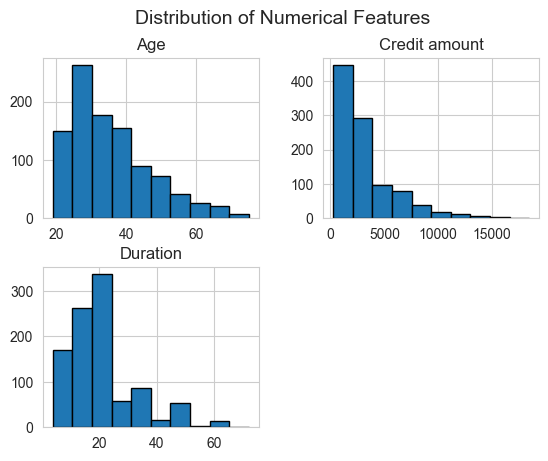

In [19]:
df[["Age", "Credit amount", "Duration"]].hist(bins = 10, edgecolor = "black")
plt.suptitle("Distribution of Numerical Features", fontsize = 14)
plt.show()

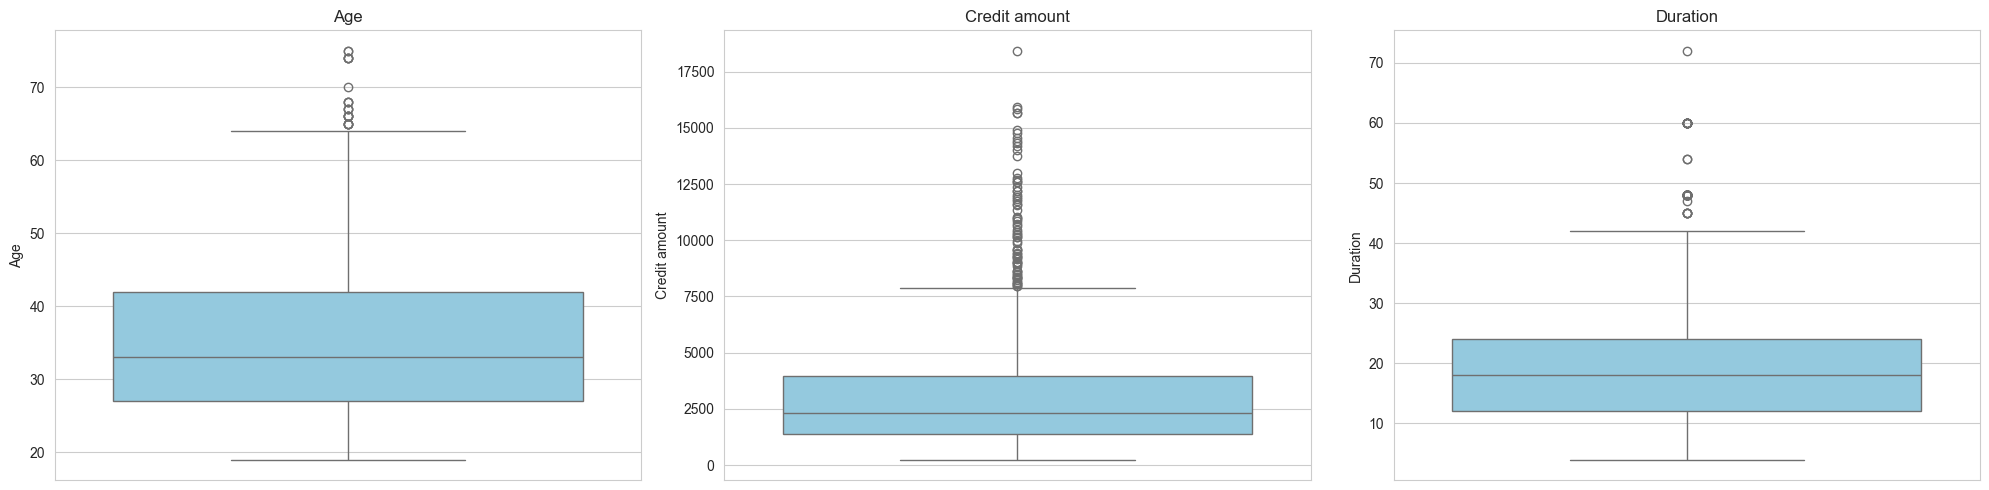

In [20]:
plt.figure(figsize=(20,5))
for i, col in enumerate(["Age","Credit amount","Duration"]):
    plt.subplot(1,3,i+1)
    sns.boxplot(y=df[col], color="skyblue")
    plt.title(col)

plt.tight_layout()
plt.show()

In [21]:
df.query("Duration >= 60")

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
29,63,male,2,own,little,little,6836,60,business,bad
134,21,female,2,own,moderate,unknown,10144,60,radio/TV,good
255,27,male,1,own,unknown,moderate,7418,60,radio/TV,good
332,24,female,3,own,moderate,moderate,7408,60,car,bad
373,63,male,3,free,unknown,unknown,13756,60,car,good
374,60,female,3,free,moderate,moderate,14782,60,vacation/others,bad
616,27,male,3,free,unknown,moderate,9157,60,radio/TV,good
637,21,male,2,own,little,unknown,15653,60,radio/TV,good
672,42,male,3,own,little,unknown,10366,60,car,good
677,24,male,2,own,moderate,moderate,5595,72,radio/TV,bad


In [22]:
categorical_cols = ["Sex","Job","Housing", "Saving accounts", "Checking account", "Purpose"]

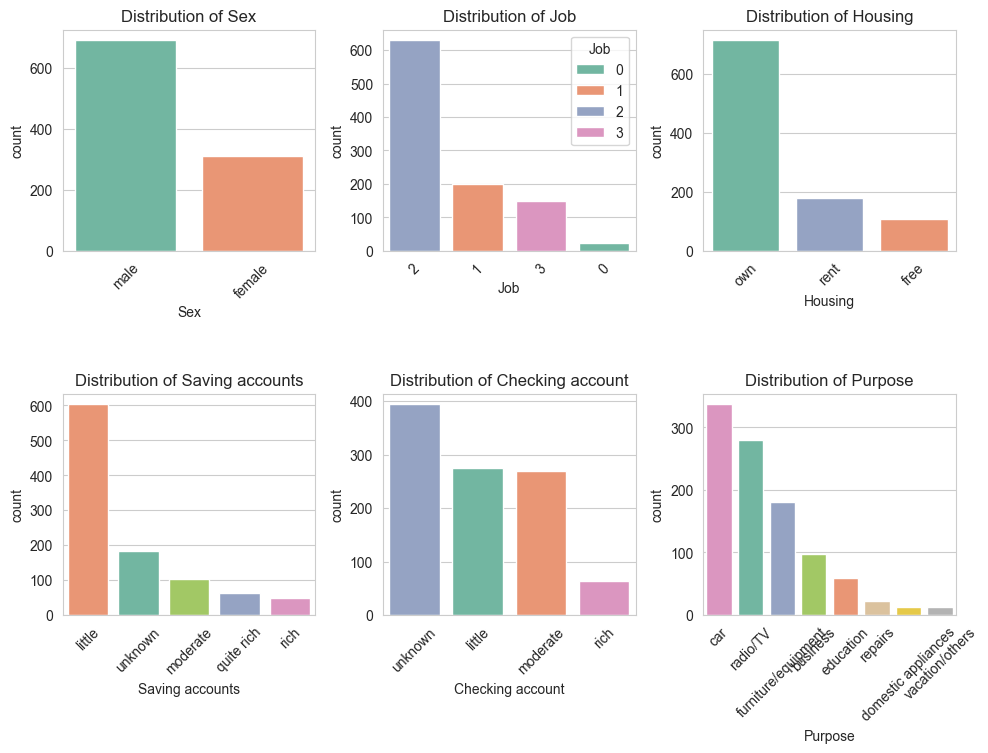

In [23]:
plt.figure(figsize= (10,10))
for i, col in enumerate(categorical_cols):
    plt.subplot(3,3,i+1)
    sns.countplot(data= df, x = col,hue= col, palette = "Set2", order = df[col].value_counts().index)
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [24]:
corr = df[["Age", "Job", "Credit amount" ,"Duration"]].corr()

In [25]:
corr

,Age,Job,Credit amount,Duration
Age,1.000000,0.015673,0.032716,-0.036136
Job,0.015673,1.000000,0.285385,0.210910
Credit amount,0.032716,0.285385,1.000000,0.624984
Duration,-0.036136,0.210910,0.624984,1.000000


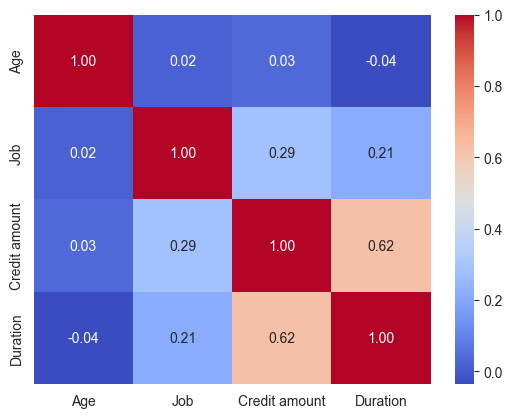

In [26]:
sns.heatmap(corr, annot= True, cmap = "coolwarm", fmt= ".2f")
plt.show()

In [27]:
df.groupby("Job") ["Credit amount"].mean()

Job
0    2745.136364
1    2358.520000
2    3070.965079
3    5435.493243
Name: Credit amount, dtype: float64

In [28]:
df.groupby("Sex") ["Credit amount"].mean()

Sex
female    2877.774194
male      3448.040580
Name: Credit amount, dtype: float64

In [29]:
pd.pivot_table(df, values= "Credit amount", index = "Housing", columns = "Purpose")

Purpose,business,car,domestic appliances,education,furniture/equipment,radio/TV,repairs,vacation/others
Housing,,,,,,,,
free,4931.800000,5834.181818,NaN,4387.266667,4100.181818,2417.333333,2750.666667,7227.250
own,3800.592105,3329.949772,1546.5,2198.647059,3107.459016,2540.493392,2866.000000,8700.375
rent,5614.125000,3487.968254,1255.5,2931.000000,2727.354167,2199.763158,1522.000000,NaN


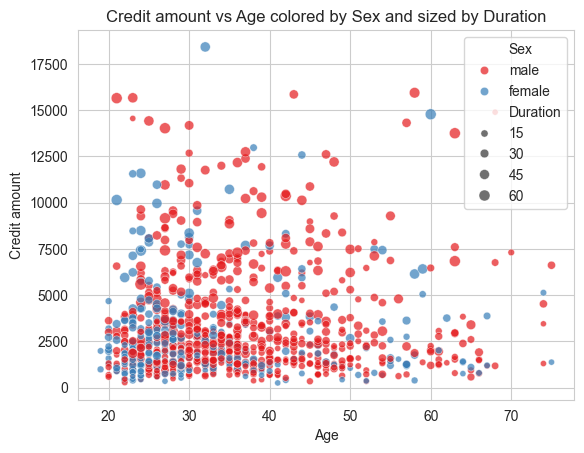

In [30]:
sns.scatterplot(data = df, x= "Age", y="Credit amount", hue = "Sex", size = "Duration", alpha= 0.7, palette="Set1")
plt.title("Credit amount vs Age colored by Sex and sized by Duration")
plt.show()

C:\Users\Karthick\AppData\Local\Temp\ipykernel_24192\1326617463.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data = df, x= "Saving accounts", y = "Credit amount", palette ="Pastel1")


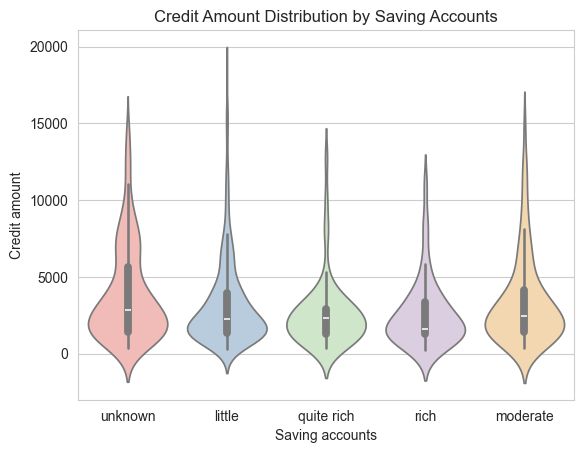

In [31]:
sns.violinplot(data = df, x= "Saving accounts", y = "Credit amount", palette ="Pastel1")
plt.title("Credit Amount Distribution by Saving Accounts")
plt.show()

In [32]:
df ["Risk"].value_counts (normalize= True) * 100

Risk
good    70.0
bad     30.0
Name: proportion, dtype: float64

C:\Users\Karthick\AppData\Local\Temp\ipykernel_24192\2001287140.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = df, x = "Risk", y=col, palette="Pastel2")
C:\Users\Karthick\AppData\Local\Temp\ipykernel_24192\2001287140.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = df, x = "Risk", y=col, palette="Pastel2")
C:\Users\Karthick\AppData\Local\Temp\ipykernel_24192\2001287140.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = df, x = "Risk", y=col, palette="Pastel2")


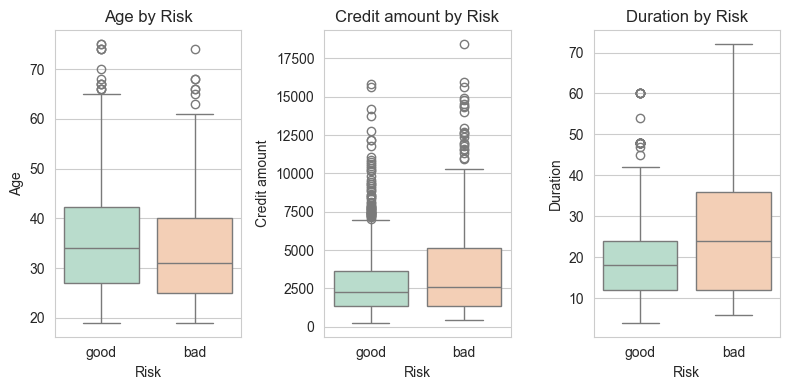

In [33]:
plt.figure(figsize= (8,4))
for i, col in enumerate (["Age", "Credit amount", "Duration"]):
    plt.subplot(1,3, i+1)
    sns.boxplot(data = df, x = "Risk", y=col, palette="Pastel2")
    plt.title(f"{col} by Risk")
plt.tight_layout()
plt.show()

In [34]:
df.groupby("Risk") [["Age", "Credit amount", "Duration"]].mean()

,Age,Credit amount,Duration
Risk,,,
bad,33.963333,3938.126667,24.860000
good,36.224286,2985.457143,19.207143


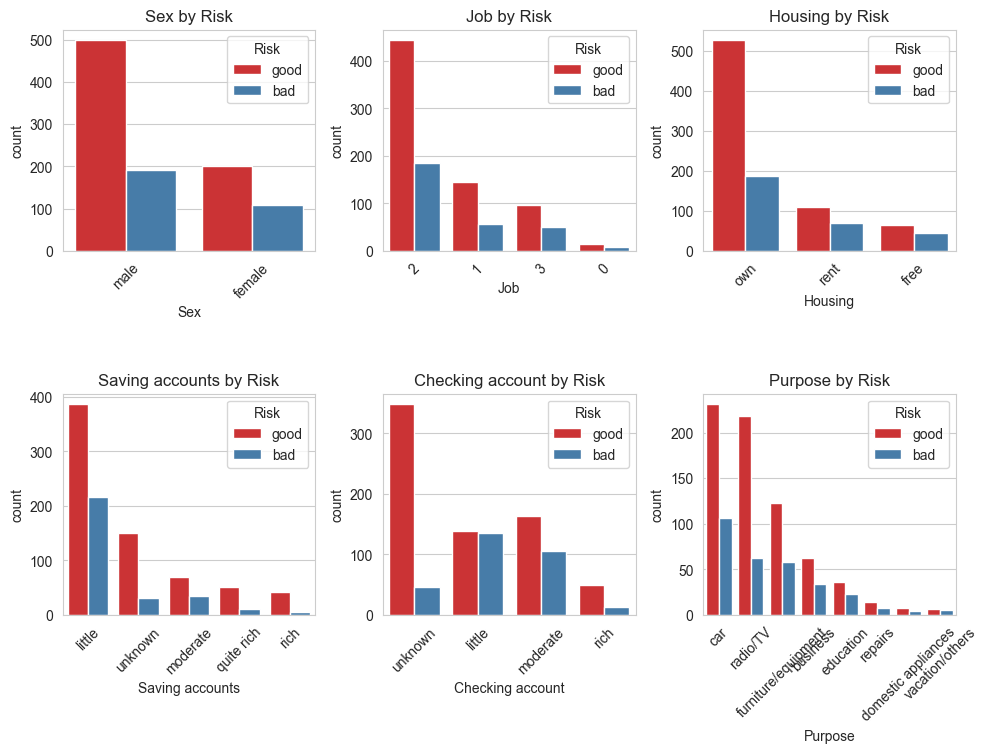

In [35]:
plt.figure(figsize= (10,10))
for i, col in enumerate (categorical_cols):
    plt.subplot(3, 3, i+ 1)
    sns.countplot(data = df, x=col, hue = "Risk", palette = "Set1", order = df[col].value_counts().index)
    plt.title(f"{col} by Risk")
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [36]:
features = ["Age", "Sex", "Job", "Housing", "Saving accounts", "Checking account", "Credit amount","Duration"]

In [37]:
target = "Risk"

In [38]:
df_model = df [features + [target]].copy()

In [39]:
df_model.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Risk
0,67,male,2,own,unknown,little,1169,6,good
1,22,female,2,own,little,moderate,5951,48,bad
2,49,male,1,own,little,unknown,2096,12,good
3,45,male,2,free,little,little,7882,42,good
4,53,male,2,free,little,little,4870,24,bad


In [40]:
from sklearn.preprocessing import LabelEncoder
import joblib

## Model Training
### Step 1: Train-Test Split (before encoding to prevent data leakage)

In [41]:
from sklearn.model_selection import train_test_split

X = df_model.drop(target, axis=1)
y = df_model[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=1
)
print('X_train:', X_train.shape, '  X_test:', X_test.shape)

X_train: (800, 8)   X_test: (200, 8)


### Step 2: Encode Categoricals (fit on train only — no data leakage)

In [42]:
le_target = LabelEncoder()
y_train = le_target.fit_transform(y_train)
y_test  = le_target.transform(y_test)
joblib.dump(le_target, '../models/target_encoder.pkl')
print('Target classes:', le_target.classes_)

Target classes: ['bad' 'good']


In [43]:
cat_cols = X_train.select_dtypes(include=['object', 'string']).columns
le_dict = {}

for col in cat_cols:
    le = LabelEncoder()
    X_train = X_train.copy()
    X_test  = X_test.copy()
    X_train[col] = le.fit_transform(X_train[col])
    X_test[col]  = le.transform(X_test[col])
    le_dict[col] = le
    joblib.dump(le, f'../models/{col}_encoder.pkl')
    print(f'  {col}: {list(le.classes_)}')

  Sex: ['female', 'male']
  Housing: ['free', 'own', 'rent']
  Saving accounts: ['little', 'moderate', 'quite rich', 'rich', 'unknown']
  Checking account: ['little', 'moderate', 'rich', 'unknown']


In [44]:
X_train.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration
561,24,1,1,2,0,0,1546,24
613,22,0,2,2,0,0,3632,24
352,38,1,3,1,4,3,3229,18
568,41,1,2,1,4,1,3979,48
295,26,0,2,1,0,1,9960,48


### Step 3: Train & Evaluate All Models (scoring = roc_auc)

In [45]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from xgboost import XGBClassifier
from sklearn.metrics import (
    roc_auc_score, confusion_matrix, classification_report
)
from sklearn.model_selection import GridSearchCV

In [46]:
def train_model(model, param_grid, X_train, y_train, X_test, y_test):
    grid = GridSearchCV(model, param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
    grid.fit(X_train, y_train)
    best_model = grid.best_estimator_
    y_prob = best_model.predict_proba(X_test)[:, 1]
    auc = roc_auc_score(y_test, y_prob)
    return best_model, auc, grid.best_params_

In [47]:
def evaluate_model(name, model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]
    auc = roc_auc_score(y_test, y_prob)
    print('\n' + '='*45)
    print(f'Model: {name}')
    print(f'ROC-AUC : {auc:.4f}')
    print('Confusion Matrix:')
    print(confusion_matrix(y_test, y_pred))
    print('Classification Report:')
    print(classification_report(y_test, y_pred))
    return auc

#### Baseline — DummyClassifier

In [48]:
dummy = DummyClassifier(strategy='most_frequent', random_state=1)
dummy.fit(X_train, y_train)
dummy_auc = evaluate_model('DummyClassifier', dummy, X_test, y_test)


Model: DummyClassifier
ROC-AUC : 0.5000
Confusion Matrix:
[[  0  60]
 [  0 140]]
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        60
           1       0.70      1.00      0.82       140

    accuracy                           0.70       200
   macro avg       0.35      0.50      0.41       200
weighted avg       0.49      0.70      0.58       200



c:\credit-risk-project\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\credit-risk-project\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\credit-risk-project\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


#### Logistic Regression

In [49]:
log_reg = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=1)
log_reg.fit(X_train, y_train)
lr_auc = evaluate_model('LogisticRegression', log_reg, X_test, y_test)


Model: LogisticRegression
ROC-AUC : 0.7542
Confusion Matrix:
[[ 44  16]
 [ 40 100]]
Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.73      0.61        60
           1       0.86      0.71      0.78       140

    accuracy                           0.72       200
   macro avg       0.69      0.72      0.70       200
weighted avg       0.76      0.72      0.73       200



#### Decision Tree

In [50]:
dt = DecisionTreeClassifier(random_state=1, class_weight='balanced')
dt_param_grid = {
    'max_depth': [3, 5, 7, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [51]:
best_dt, dt_auc, params_dt = train_model(dt, dt_param_grid, X_train, y_train, X_test, y_test)
print('Best params:', params_dt)
dt_auc = evaluate_model('DecisionTree', best_dt, X_test, y_test)

Best params: {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}

Model: DecisionTree
ROC-AUC : 0.7349
Confusion Matrix:
[[ 39  21]
 [ 38 102]]
Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.65      0.57        60
           1       0.83      0.73      0.78       140

    accuracy                           0.70       200
   macro avg       0.67      0.69      0.67       200
weighted avg       0.73      0.70      0.71       200



#### Random Forest

In [52]:
rf = RandomForestClassifier(random_state=1, class_weight='balanced', n_jobs=-1)
rf_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [53]:
best_rf, rf_auc, params_rf = train_model(rf, rf_param_grid, X_train, y_train, X_test, y_test)
print('Best params:', params_rf)
rf_auc = evaluate_model('RandomForest', best_rf, X_test, y_test)

Best params: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}

Model: RandomForest
ROC-AUC : 0.7749
Confusion Matrix:
[[ 33  27]
 [ 20 120]]
Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.55      0.58        60
           1       0.82      0.86      0.84       140

    accuracy                           0.77       200
   macro avg       0.72      0.70      0.71       200
weighted avg       0.76      0.77      0.76       200



#### Extra Trees

In [54]:
et = ExtraTreesClassifier(random_state=1, class_weight='balanced', n_jobs=-1)
et_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [55]:
best_et, et_auc, params_et = train_model(et, et_param_grid, X_train, y_train, X_test, y_test)
print('Best params:', params_et)
et_auc = evaluate_model('ExtraTrees', best_et, X_test, y_test)

Best params: {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}

Model: ExtraTrees
ROC-AUC : 0.7674
Confusion Matrix:
[[ 45  15]
 [ 39 101]]
Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.75      0.62        60
           1       0.87      0.72      0.79       140

    accuracy                           0.73       200
   macro avg       0.70      0.74      0.71       200
weighted avg       0.77      0.73      0.74       200



#### XGBoost

In [56]:
scale_pw = float((y_train == 0).sum()) / float((y_train == 1).sum())
xgb = XGBClassifier(random_state=1, scale_pos_weight=scale_pw, eval_metric='logloss')
xgb_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.05, 0.1]
}

In [57]:
best_xgb, xgb_auc, params_xgb = train_model(xgb, xgb_param_grid, X_train, y_train, X_test, y_test)
print('Best params:', params_xgb)
xgb_auc = evaluate_model('XGBoost', best_xgb, X_test, y_test)

Best params: {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 100}

Model: XGBoost
ROC-AUC : 0.7924
Confusion Matrix:
[[ 40  20]
 [ 28 112]]
Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.67      0.62        60
           1       0.85      0.80      0.82       140

    accuracy                           0.76       200
   macro avg       0.72      0.73      0.72       200
weighted avg       0.77      0.76      0.76       200



### Model Comparison — Save Best

In [58]:
results = {
    'DummyClassifier':    (dummy,    dummy_auc),
    'LogisticRegression': (log_reg,  lr_auc),
    'DecisionTree':       (best_dt,  dt_auc),
    'RandomForest':       (best_rf,  rf_auc),
    'ExtraTrees':         (best_et,  et_auc),
    'XGBoost':            (best_xgb, xgb_auc),
}

comparison_df = pd.DataFrame(
    [(k, round(v[1], 4)) for k, v in results.items()],
    columns=['Model', 'ROC-AUC']
).sort_values('ROC-AUC', ascending=False).reset_index(drop=True)

print(comparison_df.to_string(index=False))

             Model  ROC-AUC
           XGBoost   0.7924
      RandomForest   0.7749
        ExtraTrees   0.7674
LogisticRegression   0.7542
      DecisionTree   0.7349
   DummyClassifier   0.5000


In [59]:
best_name = comparison_df.iloc[0]['Model']
best_model_final = results[best_name][0]
print(f'\nBest Model: {best_name}  ROC-AUC: {results[best_name][1]:.4f}')
joblib.dump(best_model_final, '../models/best_credit_model.pkl')
print('Saved -> ../models/best_credit_model.pkl')


Best Model: XGBoost  ROC-AUC: 0.7924
Saved -> ../models/best_credit_model.pkl


### Feature Importance (Random Forest)

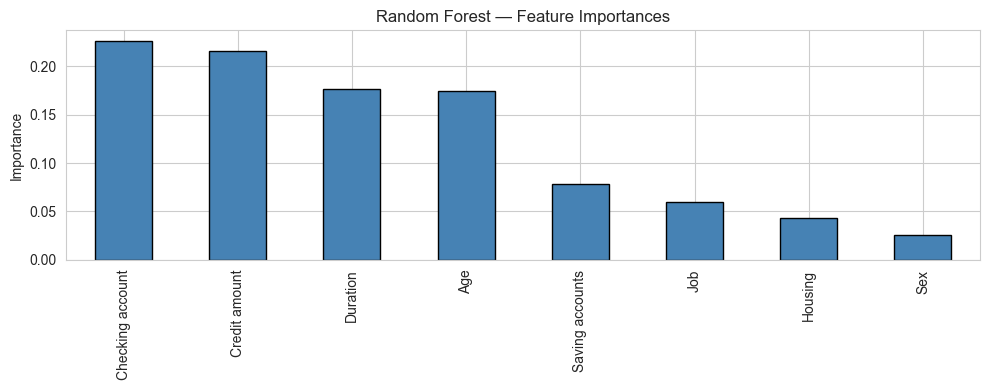

In [60]:
feat_imp = pd.Series(best_rf.feature_importances_, index=X_train.columns)
feat_imp.sort_values(ascending=False).plot(
    kind='bar', figsize=(10, 4), color='steelblue', edgecolor='black'
)
plt.title('Random Forest — Feature Importances')
plt.ylabel('Importance')
plt.tight_layout()
plt.show()

### Threshold Tuning (Random Forest)
Lowering the threshold catches more bad loans (reduces false negatives).

In [61]:
y_prob_rf = best_rf.predict_proba(X_test)[:, 1]

for threshold in [0.5, 0.4, 0.3]:
    y_custom = (y_prob_rf >= threshold).astype(int)
    print(f'\nThreshold = {threshold}')
    print(confusion_matrix(y_test, y_custom))
    print(classification_report(y_test, y_custom))


Threshold = 0.5
[[ 33  27]
 [ 20 120]]


              precision    recall  f1-score   support

           0       0.62      0.55      0.58        60
           1       0.82      0.86      0.84       140

    accuracy                           0.77       200
   macro avg       0.72      0.70      0.71       200
weighted avg       0.76      0.77      0.76       200


Threshold = 0.4
[[ 22  38]
 [ 12 128]]
              precision    recall  f1-score   support

           0       0.65      0.37      0.47        60
           1       0.77      0.91      0.84       140

    accuracy                           0.75       200
   macro avg       0.71      0.64      0.65       200
weighted avg       0.73      0.75      0.73       200


Threshold = 0.3
[[ 15  45]
 [  8 132]]
              precision    recall  f1-score   support

           0       0.65      0.25      0.36        60
           1       0.75      0.94      0.83       140

    accuracy                           0.73       200
   macro avg       0.70      0.60      0.60     